# WHO Ambient Air Quality Database (Update 2023)

[link to source](https://www.who.int/publications/m/item/who-ambient-air-quality-database-(update-2023))

## Schema

Column name | Description
--- | ---
who_region | "WHO region (1_Afr = African region, 2_Amr = Region of the Americas, 3_Sear = South-East Asian region, 4_Eur = European region, 5_Emr = Eastern Mediterranean region, 6_Wpr = Western Pacific region, 7_NonMS = non-member state) For more information:  https://www.who.int/about/who-we-are/regional-offices"
iso3 | ISO country code. See https://www.iso.org/iso-3166-country-codes.html for details. 
country_name | WHO Country Name
city | Name of the city
year | Year of the annual mean concentration
version | "Version of the database when the data was collected and published for the first time (Version 2016 V3; version 2018 V4; version 2022 V5; version 2023 V6)"
pm10_concentration | Annual mean concentration of particulate matter with diameter of 10 μm or less.
pm25_concentration | Annual mean concentration of particulate matter with diameter of 2.5μm or less.
no2_concentration | Annual mean concentration of nitrogne dioxide
pm10_tempcov | Annual temporal coverage for PM10, on a 100 base (full year= 100; 1=1% of the year)
pm25_tempcov | Annual temporal coverage for PM2.5, on a 100 base (full year= 100; 1=1% of the year)
no2_tempcov | Annual temporal coverage for NO2, on a 100 base (full year= 100; 1=1% of the year)
type_of_stations | Type as station as provided by the Member states, such as residential, background, etc.
reference | Originator of the data
who_ms | WHO member states (0 = no, 1 = yes)

## Notes

**Coverage:** If the temporal coverage for any of the measures used is not close to 100% then any classifier would be bias to particular seasons. For instance if the average PM10 was taken in the summer when it is particularly high then when comparing to an average taken over the whole year this would not be fair.

**Year:** Should all years be considered or one particular year?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv('who_air_quality_database_2023_V6.csv', na_values = ['NA'])

In [3]:
df.head(3)

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,3_Sear,IND,India,Chennai,2018,version 2022,NaN,30.0,NaN,NaN,91.0,NaN,NaN,"U.S. Department of State, United States Enviro...",https://www.airnow.gov/index.cfm?action=airnow...,9890427.0,NaN,13.087840,80.278470,1
1,3_Sear,IND,India,Solapur,2016,"version 2022, version 2018",NaN,39.0,NaN,NaN,99.0,NaN,NaN,"Central Pollution Control Board India, Environ...",NaN,985568.0,NaN,17.659919,75.906391,1
2,3_Sear,IND,India,Chennai,2019,version 2022,NaN,39.0,NaN,NaN,85.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",9890427.0,NaN,13.087840,80.278470,1


In [4]:
# Check if version 2023 is used in collaboration with other versions.
df['version'].unique()

array(['version 2022', 'version 2022, version 2018', 'version 2023',
       'version 2018', 'version 2016, version 2018', 'version 2016', nan,
       'version 2022, version 2016, version 2018',
       'version 2022, version 2016'], dtype=object)

<AxesSubplot:xlabel='year'>

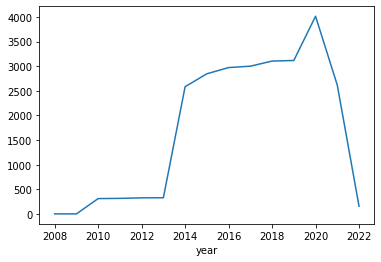

In [5]:
df[(df.version == 'version 2023')].groupby(['year']).size().plot()

In [6]:
# Use the latest version and take the year with the most datapoints.
df = df[(df.version == 'version 2023') & (df.year == 2020)]

In [7]:
# Percentage of nulls.
df.isnull().sum() / len(df)

who_region            0.000000
iso3                  0.000000
country_name          0.000000
city                  0.001744
year                  0.000000
version               0.000000
pm10_concentration    0.301271
pm25_concentration    0.431846
no2_concentration     0.265886
pm10_tempcov          0.440817
pm25_tempcov          0.626713
no2_tempcov           0.394966
type_of_stations      0.237977
reference             0.089210
web_link              0.242213
population            0.731622
population_source     1.000000
latitude              0.028158
longitude             0.028158
who_ms                0.000000
dtype: float64

<AxesSubplot:>

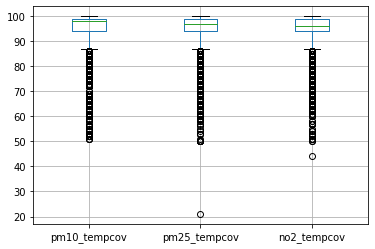

In [8]:
# Distribution of particulate coverage over the year. A low coverage would result in bias to seasonality.
df[['pm10_tempcov', 'pm25_tempcov', 'no2_tempcov']].boxplot()

In [9]:
df.groupby(['type_of_stations']).size().sort_values(ascending=False)

type_of_stations
1 Urban                                         1077
1 Rural                                          667
1 Suburban                                       525
2 Urban                                          244
3 Urban                                           74
                                                ... 
29 Urban                                           1
1 Suburban, 15 Urban                               1
3 Residential And Commercial Area, 1 Unknown       1
1 Suburban, 10 Urban                               1
2 Suburban, 10 Urban                               1
Length: 111, dtype: int64

In [10]:
# points classified with multiple stations are exploded vertically
# if particulate measured are classified with two stations, there will be two rows after exploding
df['type_of_stations_split'] = df['type_of_stations'].str.split(',', expand=False)
df = df.explode('type_of_stations_split')
df['type_of_stations_split'] = df['type_of_stations_split'].str.replace('[\d\s]+', '')

C:\Users\willf\AppData\Local\Temp\ipykernel_1140\3105934454.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['type_of_stations_split'] = df['type_of_stations_split'].str.replace('[\d\s]+', '')


In [11]:
df.groupby(['type_of_stations_split']).size().sort_values(ascending=False)

type_of_stations_split
Urban                                        1665
Suburban                                      760
Rural                                         753
Background                                     49
Traffic                                        36
Unknown                                        30
ResidentialAndCommercialArea                   14
Industrial                                     10
UrbanTraffic                                    3
FondUrbain                                      1
UrbanTraffic/ResidentialAndCommercialArea       1
dtype: int64

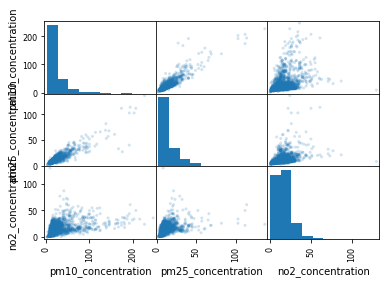

In [12]:
# Pairwise plot
pd.plotting.scatter_matrix(df[['pm10_concentration', 'pm25_concentration', 'no2_concentration']], alpha=0.2)
plt.show()

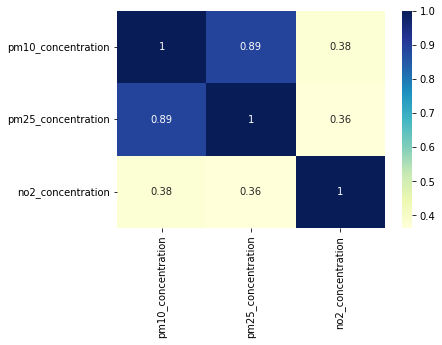

In [13]:
# PM10 and PM2.5 are closely correlated but PM2.5 has less datapoints, therefore, PM10 could just be used
sb.heatmap(df[['pm10_concentration', 'pm25_concentration', 'no2_concentration']].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [14]:
df = df[
    # Most used labels
    (df['type_of_stations_split'].isin(['Urban', 'Suburban', 'Rural'])) & 
    # Where over 90% coverage over the year is recorded
    (df['pm10_tempcov'] > 0.9) &
    (df['no2_tempcov'] > 0.9) &
    # Where the particulates are not null
    (df['pm10_concentration'].notnull()) &
    (df['no2_concentration'].notnull()) &
    (df['type_of_stations_split'].notnull())
][['pm10_concentration', 'no2_concentration', 'type_of_stations_split']]

<AxesSubplot:>

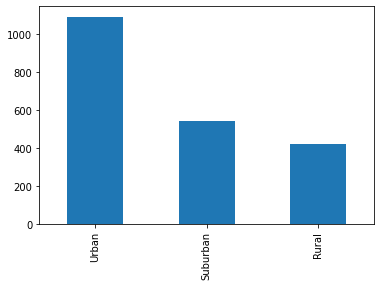

In [15]:
# Discrepancy in frequency distribution between the three labels (not uniform)
df['type_of_stations_split'].value_counts().plot(kind='bar')

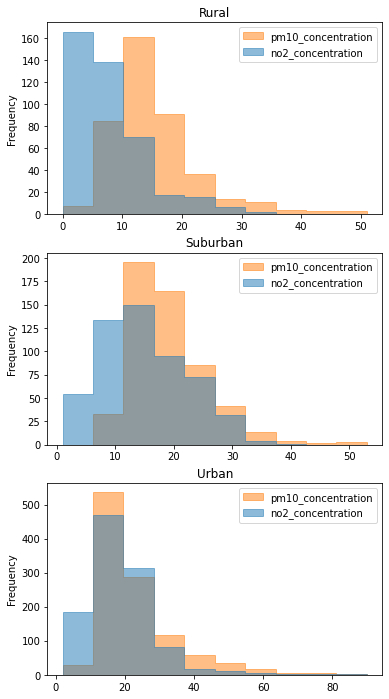

In [16]:
df.plot.hist(bins=10, alpha=0.5, column=['no2_concentration', 'pm10_concentration'], by='type_of_stations_split', figsize=(6, 12), histtype='step', fill=True)
plt.show()


Use Kolmogorov Smirnov between the two frequency histogram distributions

If the distributions are different then the model should be able to easily infer the labels

In [17]:
data = df[df['type_of_stations_split'] == 'Urban']['pm10_concentration']
urban_statistic, _, _ = stats.binned_statistic(data, np.arange(len(data)), statistic ='count', bins = 20)

In [18]:
data = df[df['type_of_stations_split'] == 'Suburban']['pm10_concentration']
suburban_statistic, _, _ = stats.binned_statistic(data, np.arange(len(data)), statistic ='count', bins = 20)

In [19]:
data = df[df['type_of_stations_split'] == 'Rural']['pm10_concentration']
rural_statistic, _, _ = stats.binned_statistic(data, np.arange(len(data)), statistic ='count', bins = 20)

In [20]:
stats.kstest(urban_statistic, urban_statistic)

KstestResult(statistic=0.0, pvalue=1.0)

In [21]:
stats.kstest(urban_statistic, rural_statistic)

KstestResult(statistic=0.25, pvalue=0.571336004933722)

In [22]:
# Urban and Suburban are very similar for PM10
stats.kstest(urban_statistic, suburban_statistic)

KstestResult(statistic=0.15, pvalue=0.9831368772656193)

In [23]:
data = df[df['type_of_stations_split'] == 'Urban']['no2_concentration']
urban_statistic, _, _ = stats.binned_statistic(data, np.arange(len(data)), statistic ='count', bins = 20)

In [24]:
data = df[df['type_of_stations_split'] == 'Rural']['no2_concentration']
rural_statistic, _, _ = stats.binned_statistic(data, np.arange(len(data)), statistic ='count', bins = 20)

In [25]:
stats.kstest(urban_statistic, rural_statistic)

KstestResult(statistic=0.25, pvalue=0.571336004933722)

In [26]:
# Urban and Suburban are very similar for NO2
stats.kstest(urban_statistic, suburban_statistic)

KstestResult(statistic=0.2, pvalue=0.8319696107963263)

In [27]:
# Remove suburban from the data as its too similar to urban
# A model will struggle to infer any difference
df = df[df['type_of_stations_split'].isin(['Urban', 'Rural'])][['pm10_concentration', 'no2_concentration', 'type_of_stations_split']]

# Model

The model needs to handle these data issues:

- Small dataset
- Label inbalance (more urban points than rural)

Could use SMOTE to balance the data?

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

In [29]:
# Percentage of urban data points
len(df[df['type_of_stations_split'] == 'Urban']) / len(df)

0.7232913072329131

In [30]:
X = df[['pm10_concentration', 'no2_concentration']]
y = df['type_of_stations_split']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
rfc = DecisionTreeClassifier().fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8311258278145696

In [32]:
svc = SVC().fit(X_train, y_train)
svc.score(X_test, y_test)

0.8708609271523179

In [33]:
# Resolve dataset imbalance with SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
rfc = DecisionTreeClassifier().fit(X_train, y_train)
rfc.score(X_test, y_test)

0.823394495412844

In [35]:
svc = SVC().fit(X_train, y_train)
svc.score(X_test, y_test)

0.7935779816513762